## Read Data 

In [1]:
import screed # A Python library for reading FASTA and FASQ file format.
def readFastaFile(inputfile):
    """
    Reads and returns file as FASTA format with special characters removed.
    """
    with screed.open(inputfile) as seqfile:
        for read in seqfile:
            seq = read.sequence
    return seq 

In [2]:
# read sequence 
seq = readFastaFile("../data/Haemophilus_influenzae.fasta")

## Base Counts

In [3]:
# Agrees with output from Matlab at http://www.computational-genomics.net/case_studies/haemophilus_demo.html     
def basecount(seq,useall=False,calcfreqs=False,verbose=False):
    """ 
    [Takes a sequence file as input and performs the sequence operations]
    Arguments:
        seq {[String]} -- [A sequence file that contains DNA letters and others.]

    Keyword Arguments:
        useall {bool} -- [If we want to look at every letter that appears in the sequence] (default: {False})
        calcfreqs {bool} -- [If we want to calculate the frequency of each base] (default: {False})
        verbose {bool} -- [If we want to print sequence information] (default: {False})
        
    Prints out the number or frequency of each symbol in a DNA sequence
    * Followed ideas at http://bugs.python.org/issue3332 and 
    * http://stackoverflow.com/questions/364519/in-python-how-to-i-iterate-over-a-dictionary-in-sorted-order
    * for testing the hash contains what it should:   
    >>> basecount("CT") == {'A': 0, 'C': 1, 'G': 0, 'T': 1}
    True
    >>> basecount("") == {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    True
    >>> basecount("CGGAAAGATGATGGAACGTT") == {'A': 7, 'C': 2, 'G': 7, 'T': 4}
    True
    >>> basecount("CGGAAAGATGATGGAACGTT",calcfreqs=True) == { 'A': 0.35, 'C': 0.1, 'G': 0.35, 'T': 0.2}
    True
    """
    length = len(seq)
    if verbose:
        print(f"The sequence is {length} base-pairs long") 
    if calcfreqs:
        # Make a dictionary "myfreq" to contain the frequency of each base.
        myfreq = {}
    else:
        # Make a dictionary "mynum" to contain the number of occurrences of each base.
        mynum = {}
    # If we want to look at every letter that appears in the sequence:    
    if useall:
        myset = set(seq)
    # If we just want to look at the four bases A,C,G,T:
    else:
        myset = ("A", "C", "T", "G")
    for letter in myset:
        num = seq.count(letter)
        if calcfreqs:
            # Note that the frequency is calculated out of the total
            # sequence length, even though some bases are not A/G/C/T
            freq = num/length
            myfreq[letter] = freq
            if verbose:
                print(f"The frequency of {letter} is {freq:.2f}")
        else:
            mynum[letter] = num
            if verbose:
                print(f"There are {num} {letter}")
    if calcfreqs:
        return myfreq
    else:
        return mynum

In [5]:
freq = basecount(seq)

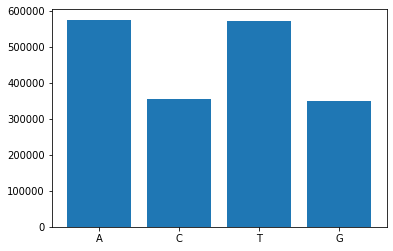

In [8]:
import matplotlib.pyplot as plt 
plt.bar(freq.keys(), freq.values())
plt.show() 

In [9]:
pc = basecount(seq, useall=True)

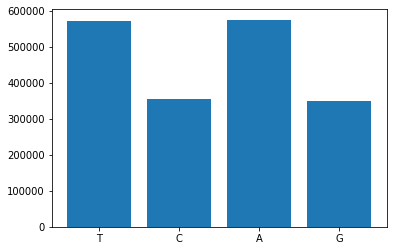

In [10]:
import matplotlib.pyplot as plt 
plt.bar(pc.keys(), pc.values())
plt.show() 

In [60]:
basecount(seq, calcfreqs=True)

{'A': 0.3103574230029911,
 'C': 0.19224200722345294,
 'T': 0.3091210100766307,
 'G': 0.18827955969692528}

In [61]:
basecount(seq, verbose=True)

The sequence is 1856176 base-pairs long
There are 576078 A
There are 356835 C
There are 573783 T
There are 349480 G


{'A': 576078, 'C': 356835, 'T': 573783, 'G': 349480}

## Build K-mer

In [82]:
from itertools import combinations_with_replacement
seq = combinations_with_replacement(['A', 'T', 'G', 'C'], 2)
for p in list(seq):
    print(p) 

('A', 'A')
('A', 'T')
('A', 'G')
('A', 'C')
('T', 'T')
('T', 'G')
('T', 'C')
('G', 'G')
('G', 'C')
('C', 'C')


In [75]:
kmers('ATCG', 2) 

('G', 'C')

## Dimer Counts 

In [11]:
# Agrees with result at http://www.computational-genomics.net/case_studies/haemophilus_demo.html
def dimercount(seq,verbose=False,calcfreqs=False):
    """
    [Takes a sequence file as input and performs the sequence operations]
    Arguments:
        seq {[String]} -- [A sequence file that contains DNA letters and others.]

    Keyword Arguments:
        useall {bool} -- [If we want to look at every letter that appears in the sequence] (default: {False})
        calcfreqs {bool} -- [If we want to calculate the frequency of each base] (default: {False})
        verbose {bool} -- [If we want to print sequence information] (default: {False})
    
    Prints out the frequency of dimers in a long DNA sequence
    >>> dimercount("CGGAAAGATGATGGAACGTT") == {'AA': 3, 'AC': 1, 'AG': 1, 'AT': 2, 'GA': 4, 'GG': 2, 'GT': 1, 'CG': 2, 'TG': 2, 'TT': 1}
    True
    >>> dimercount("CGGAAAGATGATGGAACGTT",calcfreqs=True) == {'GG': 0.10526315789473684, 'CG': 0.10526315789473684, 'AG': 0.05263157894736842, 'TT': 0.05263157894736842, 'AA': 0.15789473684210525, 'AC': 0.05263157894736842, 'GT': 0.05263157894736842, 'AT': 0.10526315789473684, 'GA': 0.21052631578947367, 'TG': 0.10526315789473684}
    True
    """
    # Normally we pass in a sequence object 'myseq', but in the doc-test
    # above, I just pass in a string:
    try:
        seq = seq.tostring()
    except AttributeError:
        seq = seq
    length = len(seq)
    # Define the set of dimers we are interested in
    myset = ("AA", "AC", "AG", "AT", "GA", "GC", "GG", "GT",
             "CA", "CC", "CG", "CT", "TA", "TC", "TG", "TT")
    # Make a dictionary "mynum" to contain the number of occurrences of each dimer.
    mynum = {}
    if calcfreqs:
        # Make a dictionary "myfreq" to contain the frequency of each dimer.
        myfreq = {}
    # Move the window by jumpsize bp at a time
    windowsize = 2
    jumpsize = 1
    for i in range (0, length-windowsize+1, jumpsize):
        subseq = seq[i:i+windowsize]
        # if subseq is a member of set 'myset':
        if subseq in myset:
            if subseq in mynum: # if subseq is already in dictionary 'mynum':
                mynum[subseq] += 1
            else:
                mynum[subseq] = 1
    for dimer in myset:
    # The total number of dimers in a sequence is length-1.
    # Note that the dimer frequency is given out of length-1, even
    # though some of the dimers in the sequence are not those in
    # "myset" above, because of non-A/G/C/T bases.
        if dimer in mynum: # if dimer is already in dictionary 'mynum':
            pc = mynum[dimer]/(length-1)
            if calcfreqs:
                myfreq[dimer] = pc
            if verbose:
                print("The frequency of %s is %d (fraction %f)" % (dimer, mynum[dimer], pc))
    if calcfreqs:
        return myfreq
    else:
        return mynum


In [ ]:
 """[Takes a sequence file as input and performs the sequence operations]
    Arguments:
        seq {[String]} -- [A sequence file that contains DNA letters and others.]

    Keyword Arguments:
        useall {bool} -- [If we want to look at every letter that appears in the sequence] (default: {False})
        calcfreqs {bool} -- [If we want to calculate the frequency of each base] (default: {False})
        verbose {bool} -- [If we want to print sequence information] (default: {False})
        
    Prints out the number or frequency of each symbol in a DNA sequence
    * Followed ideas at http://bugs.python.org/issue3332 and 
    * http://stackoverflow.com/questions/364519/in-python-how-to-i-iterate-over-a-dictionary-in-sorted-order
    * for testing the hash contains what it should:   
    >>> basecount("CT") == {'A': 0, 'C': 1, 'G': 0, 'T': 1}
    True
    >>> basecount("") == {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    True
    >>> basecount("CGGAAAGATGATGGAACGTT") == {'A': 7, 'C': 2, 'G': 7, 'T': 4}
    True
    >>> basecount("CGGAAAGATGATGGAACGTT",calcfreqs=True) == { 'A': 0.35, 'C': 0.1, 'G': 0.35, 'T': 0.2}
    True
    """
        
   

In [15]:
dimers = dimercount(seq)

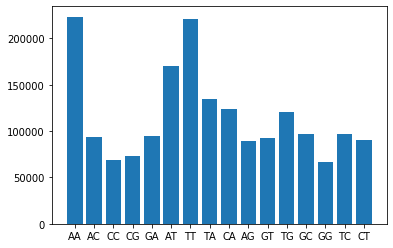

In [16]:
import matplotlib.pyplot as plt 
plt.bar(dimers.keys(), dimers.values())
plt.show() 

In [25]:
freqs = basecount(seq)

In [26]:
freqs

{'A': 576078, 'C': 356835, 'T': 573783, 'G': 349480}

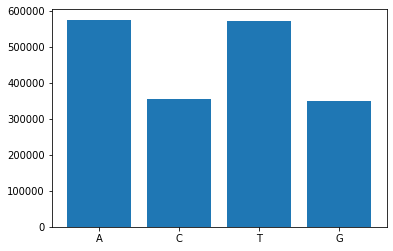

In [27]:
plt.bar(freqs.keys(), freqs.values())
plt.show() 

In [17]:
plt.pie(freqs.values() labels = freqs.keys(), autopct='%1.1f%%')
plt.show() 

SyntaxError: invalid syntax (<ipython-input-17-fb6318a26bba>, line 1)

In [16]:
basecount(seq, useall=True)

{'C': 356835, 'G': 349480, 'T': 573783, 'A': 576078}

In [9]:
# Agrees with result at http://www.computational-genomics.net/case_studies/haemophilus_demo.html
def dimercount(myseq,verbose=False,calcfreqs=False):
    """Prints out the frequency of dimers in a long DNA sequence
    >>> dimercount("CGGAAAGATGATGGAACGTT") == {'AA': 3, 'AC': 1, 'AG': 1, 'AT': 2, 'GA': 4, 'GG': 2, 'GT': 1, 'CG': 2, 'TG': 2, 'TT': 1}
    True
    >>> dimercount("CGGAAAGATGATGGAACGTT",calcfreqs=True) == {'GG': 0.10526315789473684, 'CG': 0.10526315789473684, 'AG': 0.05263157894736842, 'TT': 0.05263157894736842, 'AA': 0.15789473684210525, 'AC': 0.05263157894736842, 'GT': 0.05263157894736842, 'AT': 0.10526315789473684, 'GA': 0.21052631578947367, 'TG': 0.10526315789473684}
    True
    """
    # Normally we pass in a sequence object 'myseq', but in the doc-test
    # above, I just pass in a string:
    try:
        seq = myseq.tostring()
    except AttributeError:
        seq = myseq
    length = len(seq)
    # Define the set of dimers we are interested in
    myset = ("AA", "AC", "AG", "AT", "GA", "GC", "GG", "GT",
             "CA", "CC", "CG", "CT", "TA", "TC", "TG", "TT")
    # Make a dictionary "mynum" to contain the number of occurrences of each dimer.
    mynum = {}
    if calcfreqs:
        # Make a dictionary "myfreq" to contain the frequency of each dimer.
        myfreq = {}
    # Move the window by jumpsize bp at a time
    windowsize = 2
    jumpsize = 1
    for i in range (0, length-windowsize+1, jumpsize):
        subseq = seq[i:i+windowsize]
        # if subseq is a member of set 'myset':
        if subseq in myset:
            if subseq in mynum: # if subseq is already in dictionary 'mynum':
                mynum[subseq] += 1
            else:
                mynum[subseq] = 1
    for dimer in myset:
    # The total number of dimers in a sequence is length-1.
    # Note that the dimer frequency is given out of length-1, even
    # though some of the dimers in the sequence are not those in
    # "myset" above, because of non-A/G/C/T bases.
        if dimer in mynum: # if dimer is already in dictionary 'mynum':
            pc = mynum[dimer]/(length-1)
            if calcfreqs:
                myfreq[dimer] = pc
            if verbose:
                print("The frequency of %s is %d (fraction %f)" % (dimer, mynum[dimer], pc))
    if calcfreqs:
        return myfreq
    else:
        return mynum


In [10]:
dimercount(seq)

{'AA': 223369,
 'AC': 93850,
 'CC': 69297,
 'CG': 73364,
 'GA': 94221,
 'AT': 169804,
 'TT': 221014,
 'TA': 134844,
 'CA': 123643,
 'AG': 89055,
 'GT': 92435,
 'TG': 120812,
 'GC': 96575,
 'GG': 66249,
 'TC': 97113,
 'CT': 90530}

In [18]:
# Agrees with result at http://www.computational-genomics.net/case_studies/haemophilus_demo.html
def ntdensity1(seq,windowsize,verbose=False,jumpsize=1000,makePlot=False):
    """Plots the G+C content along a sequence using a sliding window
    >>> ntdensity1("CGGAAAGATGATGGAACGTT",4,verbose=False,jumpsize=1) == ([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0], {'G+C': [75.0, 50.0, 25.0, 25.0, 25.0, 25.0, 50.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], 'A+T': [25.0, 50.0, 75.0, 75.0, 75.0, 75.0, 50.0, 75.0, 75.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]})                                            
    True
    """
    length = len(seq)
    # Make a dictionary to contain two empty lists
    freqs = { "G+C": [], "A+T": [] }
    myset = ("A+T", "G+C")
    # Note: instead of storing G+C, A+T in a hash, could just have coded G+C=0, A+T=1, and stored these values in arrays.
    midpoints = []
    # Move the window by jumpsize bp at a time.
    # The first window we look at is from i=0 to i=windowsize.
    # For example, if the sequence is 30000 bases long, windowsize=10000.
    # In the first loop, we look at i=0 to i=10000.
    # In the second loop, we look at i=1000 to i=11000. ...
    # In the last loop, we look at i=29000 to i=30000.
    # Note: for i = range(0,10) goes from i=0...9. 
    for i in range(0,length-windowsize+1,jumpsize):
        subseq = seq[i:i+windowsize]
        if verbose:
            start = i
            end = i+windowsize
            print("start %d end %d subseq is %s length %d windowsize %d" % (start,end,subseq,length,windowsize))
        assert len(subseq)==windowsize, "ERROR: ntdensity1: length of subseq is not windowsize"
        for dimer in myset:
            letter1 = dimer[0:1]
            letter2 = dimer[2:3]
            num1 = subseq.count(letter1)
            num2 = subseq.count(letter2)
            num = num1 + num2
            pc = (100 * num)/windowsize
            freqs[dimer].append(pc)
        # Find the mid-point of the window:
        # For example, if the window is from i=1000 to i=11000,
        # midpoint = 12000/2 = 6000
        midpoint = (i + i + windowsize)/2
        midpoints.append(midpoint)
    if makePlot:
        # Call the plotting function
        midpoints2 = [x/1000 for x in midpoints] # list comprehension
        myscatterplot(midpoints2,freqs,'Base-pair position (kb)','%') # Convert to kb for plotting
    # Return the results
    return(midpoints,freqs)


In [23]:
m, f   = ntdensity1(seq, windowsize=9000)

In [25]:
m[1:20]

[5500.0,
 6500.0,
 7500.0,
 8500.0,
 9500.0,
 10500.0,
 11500.0,
 12500.0,
 13500.0,
 14500.0,
 15500.0,
 16500.0,
 17500.0,
 18500.0,
 19500.0,
 20500.0,
 21500.0,
 22500.0,
 23500.0]

In [28]:
f.keys() 

dict_keys(['G+C', 'A+T'])

In [29]:
f.values() 

dict_values([[36.58888888888889, 36.51111111111111, 36.63333333333333, 36.56666666666667, 36.15555555555556, 36.25555555555555, 36.53333333333333, 35.51111111111111, 35.0, 34.62222222222222, 34.67777777777778, 34.166666666666664, 33.96666666666667, 34.666666666666664, 34.8, 34.98888888888889, 36.8, 37.44444444444444, 37.922222222222224, 37.94444444444444, 38.71111111111111, 38.94444444444444, 38.388888888888886, 38.355555555555554, 38.266666666666666, 37.27777777777778, 37.577777777777776, 37.422222222222224, 37.98888888888889, 38.455555555555556, 38.6, 39.24444444444445, 39.53333333333333, 39.355555555555554, 39.522222222222226, 39.36666666666667, 39.32222222222222, 38.63333333333333, 38.15555555555556, 37.87777777777778, 37.36666666666667, 36.98888888888889, 37.12222222222222, 37.22222222222222, 37.1, 36.888888888888886, 36.72222222222222, 36.32222222222222, 36.644444444444446, 36.55555555555556, 36.56666666666667, 36.3, 36.56666666666667, 36.28888888888889, 36.15555555555556, 35.633

ValueError: x and y must have same first dimension, but have shapes (1848,) and (1,)

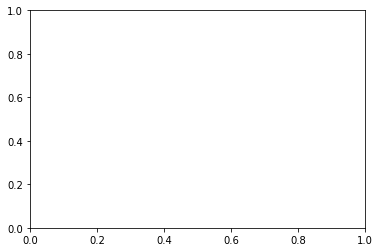

In [30]:
plt.plot(m, f.values())
plt.show() 

In [44]:
import matplotlib.pyplot as plt 
def myscatterplot(xvar,ydict,xlab,ylab):
    """Makes a scatterplot of y-variable(s) against an x-variable"""
    # See http://matplotlib.sourceforge.net/examples/api/date_demo.html
    # for where I got the plotting code from
    fig = plt.figure(figsize=(14,6))
    ax = fig.add_subplot(111)
    yvarnames = []
    for yvar in ydict:
        yvarnames.append(yvar)
        ax.plot(xvar,ydict[yvar])
    ax.grid(True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    ax.legend(yvarnames, loc="upper right")
    plt.grid(True)
    plt.savefig("ntdensity.png")
    plt.show()

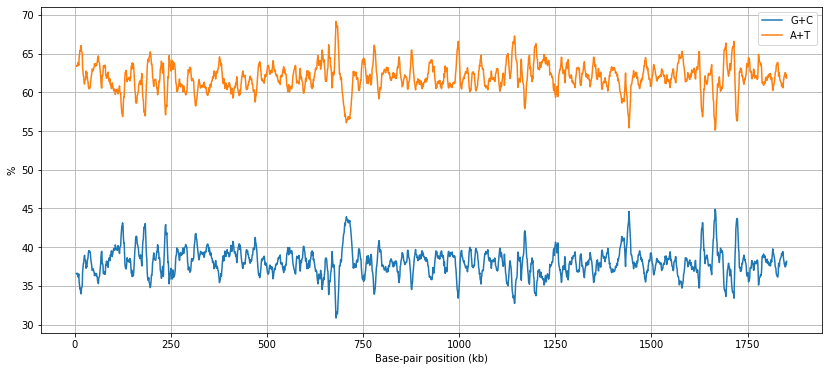

In [45]:
fig = ntdensity1(seq, windowsize=9000, makePlot=True)

In [18]:
# Agrees with result at http://www.computational-genomics.net/case_studies/haemophilus_demo.html
# Checked this works on a very short sequence.
def ntdensity2(seq,windowsize,verbose=False,jumpsize=1000,makePlot=False):
    """Plots the base frequency along a sequence using a sliding window
    >>> ntdensity2("CGGAAAGATGATGGAACGTT",4,jumpsize=1) == ([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0], {'A': [25.0, 50.0, 75.0, 75.0, 75.0, 50.0, 25.0, 50.0, 25.0, 25.0, 25.0, 25.0, 50.0, 50.0, 50.0, 25.0, 0.0], 'C': [25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 25.0, 25.0], 'T': [0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 25.0, 25.0, 50.0, 25.0, 25.0, 25.0, 0.0, 0.0, 0.0, 25.0, 50.0], 'G': [50.0, 50.0, 25.0, 25.0, 25.0, 25.0, 50.0, 25.0, 25.0, 50.0, 50.0, 50.0, 50.0, 25.0, 25.0, 25.0, 25.0]})
    True
    
    """
    length = len(seq)
    # make a dictionary to contain four empty lists
    freqs = { "A": [], "T": [], "G": [], "C": [] }
    myset = ("A", "C", "T", "G")
    midpoints = []
    # Move the window by jumpsize bp at a time.
    for i in range(0,length-windowsize+1,jumpsize):
        subseq = seq[i:i+windowsize]
        if verbose:
            start = i
            end = i+windowsize
            print("start %d end %d subseq is %s length %d windowsize %d" % (start,end,subseq,length,windowsize))
        assert len(subseq)==windowsize, "ERROR: ntdensity2: length of subseq is not windowsize"
        for letter in myset:
            num = subseq.count(letter)
            pc = 100 * num/windowsize
            freqs[letter].append(pc)
        # Find the mid-point of the window:
        # For example, if the window is from i=1000 to i=11000,
        # midpoint = 12000/2 = 6000
        midpoint = (i + i + windowsize)/2
        midpoints.append(midpoint)
    if makePlot:
        # Call the plotting function
        midpoints2 = [x/1000 for x in midpoints] # list comprehension
        myscatterplot(midpoints2,freqs,'Base-pair position (kb)','%') # Convert to kb for plotting
    # Return the results:
    return(midpoints,freqs)
   

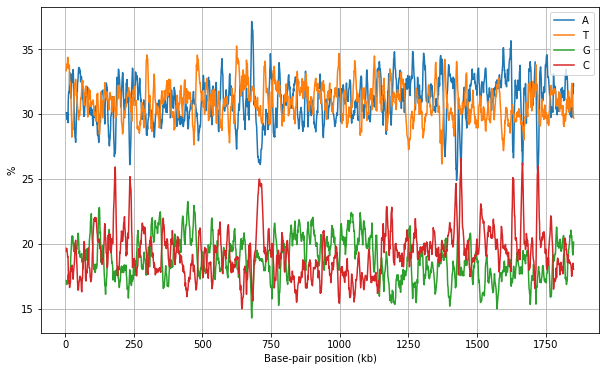

([4500.0,
  5500.0,
  6500.0,
  7500.0,
  8500.0,
  9500.0,
  10500.0,
  11500.0,
  12500.0,
  13500.0,
  14500.0,
  15500.0,
  16500.0,
  17500.0,
  18500.0,
  19500.0,
  20500.0,
  21500.0,
  22500.0,
  23500.0,
  24500.0,
  25500.0,
  26500.0,
  27500.0,
  28500.0,
  29500.0,
  30500.0,
  31500.0,
  32500.0,
  33500.0,
  34500.0,
  35500.0,
  36500.0,
  37500.0,
  38500.0,
  39500.0,
  40500.0,
  41500.0,
  42500.0,
  43500.0,
  44500.0,
  45500.0,
  46500.0,
  47500.0,
  48500.0,
  49500.0,
  50500.0,
  51500.0,
  52500.0,
  53500.0,
  54500.0,
  55500.0,
  56500.0,
  57500.0,
  58500.0,
  59500.0,
  60500.0,
  61500.0,
  62500.0,
  63500.0,
  64500.0,
  65500.0,
  66500.0,
  67500.0,
  68500.0,
  69500.0,
  70500.0,
  71500.0,
  72500.0,
  73500.0,
  74500.0,
  75500.0,
  76500.0,
  77500.0,
  78500.0,
  79500.0,
  80500.0,
  81500.0,
  82500.0,
  83500.0,
  84500.0,
  85500.0,
  86500.0,
  87500.0,
  88500.0,
  89500.0,
  90500.0,
  91500.0,
  92500.0,
  93500.0,
  94500.0,
  955

In [19]:
ntdensity2(seq, windowsize=9000, makePlot=True)

In [21]:
basecount(seq)

{'A': 576078, 'C': 356835, 'T': 573783, 'G': 349480}

In [22]:
freq = basecount(seq)

In [23]:
freq

{'A': 576078, 'C': 356835, 'T': 573783, 'G': 349480}

In [24]:
freq.items() 

dict_items([('A', 576078), ('C', 356835), ('T', 573783), ('G', 349480)])

In [25]:
freq.values() 

dict_values([576078, 356835, 573783, 349480])

In [27]:
values = [] 
letters = [] 
for key, val in freq.items():
    values.append(val)
    letters.append(key) 

In [28]:
values

[576078, 356835, 573783, 349480]

In [29]:
letters

['A', 'C', 'T', 'G']

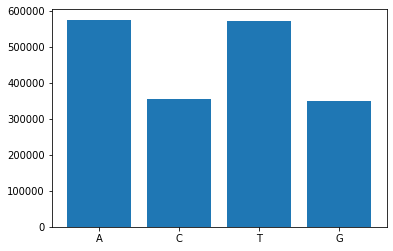

In [31]:
plt.bar(letters, values);

In [34]:
import seaborn as sns 

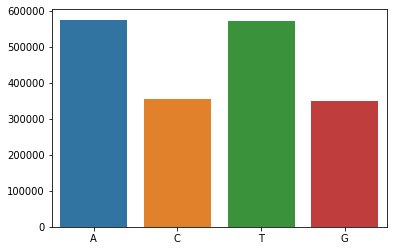

In [36]:
sns.barplot(x=letters, y=values); 

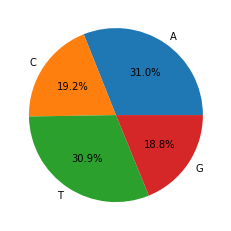

In [41]:
plt.pie(values, labels=letters, autopct='%1.1f%%')
plt.show() 